In [1]:
import types
import pandas as pd


df_data_1 = pd.read_csv(BankChurners.csv)

# BankChurners.csv file provided ...



In [2]:
# This part has Several Useful Functions and Import of Packages that we need in the Modeling That Follows
#
#

from matplotlib import pyplot as plt
from scipy.stats import *
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 


def histRetained(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 0]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'green',edgecolor='white')
    C.plot(kind='hist',figsize = (10, 8),color ='green',edgecolor='blue')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Retained Customers')
    plt.title('Histogram of Retained Credit Card Customers Size n = 100')
    plt.show()
    return

def histLost(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 1]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'red',edgecolor='black')
    C.plot(kind = 'hist', figsize = (10,8),color='red',edgecolor='black')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Lost Customers')
    plt.title('Histogram of Lost Credit Card Customers Size n = 100')
    plt.show()
    return
    
    
def boxPlot(dFrame,coL):
    dFrame[coL].plot(kind='box', figsize=(8, 6), color='black', vert=True)
    plt.title('Box plot of ' + coL.upper() + ' Feature')
    plt.ylabel('Statistics')
    plt.show()
    return


def describeData(dFrame,coLs):
    for coL in coLs:
        print(dFrame[coL].describe())
    return
    
    
def stats(dFrame,coLs):
    for coL in coLs:
        print('Statistics for Feature ', coL)
        print('Max = %.4f' % dFrame[coL].max())
        print('Min = %.4f' %dFrame[coL].min())
        print('Mean = %.4f' % dFrame[coL].mean())
        print('Skewness = %.4f' % dFrame[coL].skew())
        print('Kurtosis = %.4f' % dFrame[coL].kurtosis())
        print('------------------------------------------------------\n')
    return
    

def removeOutliers(dFrame,coLs): #Here coLs is a LIST of columns from which OUTLIERS are to be removed ...
    for coL in coLs:
        dFrame = dFrame[np.abs(zscore(dFrame[coL])) < 3.0]
    return dFrame


def zscoreData(dFrame,coLs): # Here coLs is a LIST of columns (numeric) whose contents you wish to normalize (z)
    for aCol in coLs:
#        dFrame[aCol] = (dFrame[aCol]-dFrame[aCol].mean())/dFrame[aCol].std()
        dFrame[aCol] = zscore(dFrame[aCol])
    return dFrame
    


def cleanData(dFrame, Feature): # Here Feature is a Column Feature of dFrame based on which any missing or NULL data is removed.
    dFrame = dFrame.drop_duplicates()
    dFrame.dropna(axis = 0, inplace = True)
    missing_data = dFrame.isnull()
    dFrame = dFrame[dFrame[Feature] != missing_data[Feature]]
    return dFrame
    

def LabelEncoding(dFrame,coLs):  # Here coLs is a LIST whose contents you wish to Label Encode 0, 1, 2, 3, ... etc.
    labelEncoder = LabelEncoder()
    for aCol in coLs:
        dFrame[aCol] = labelEncoder.fit_transform(dFrame[aCol])
    dFrame = pd.DataFrame(dFrame)
    return dFrame


def dropColumns(dFrame,coLs): # Here coLs is a list of columns to be dropped and must be passed as a LIST ...
    dFrame.drop(coLs, axis = 1, inplace = True)
    return dFrame

    
def oneHotEncoding(dFrame,coLs): # Here coLs is a LIST whose contents you wish to ONE-HOT encode ...
    for col in coLs:
        dFrame_oneHot = pd.get_dummies(dFrame[col],prefix = col, prefix_sep=" ").astype('int64')
        for oneHotcol in dFrame_oneHot.columns:
            dFrame[oneHotcol] = dFrame_oneHot[oneHotcol]
        dropColumns(dFrame, [col])
    return dFrame
    
    
def getFeatureColumns(dFrame,labelColumn):
    return [x for x in dFrame.columns if x != labelColumn]


def corRelation(dFrame): #Needs all columns to be at least Label Encoded Numerically
    XDIM, YDIM = dFrame.corr().shape
    for i in range(XDIM):
        for j in range(i+1,YDIM):
            if (dFrame.corr().iloc[i,j] > 0.7):
                print('Feature1 = ', dFrame.columns[i], 'Feature2 = ',dFrame.columns[j], 'Correlation = %.4f' % dFrame.corr().iloc[i,j])
    return
    

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return

In [3]:
df1 = df_data_1

In [4]:
df1.shape

(10127, 23)

In [5]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df1.columns.str.strip()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## The plan: Clean Data, Drop Columns Not Needed, Take Out Outliers, Normalize, Label Encode, One Hot Encode (ETL Stuff..) Follow by Modeling ...

In [7]:
# Takes out missing data, duplicate data, NaN and so on ...

df1 = cleanData(df1,'CLIENTNUM')

In [8]:
df1 = dropColumns(df1, [df1.columns[-1],df1.columns[-2],'CLIENTNUM'])

In [9]:
df1 = df1[df1['Education_Level'] != 'Unknown']
df1 = df1[df1['Marital_Status'] != 'Unknown']
df1 = df1[df1['Income_Category'] != 'Unknown']

In [10]:
df1.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Use unique command as well as value_counts() to locate any other missing data ...

In [11]:
df1['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [13]:
for coL in df1.columns:
    print(coL)
    print(df1[coL].value_counts())

Attrition_Flag
Existing Customer    5968
Attrited Customer    1113
Name: Attrition_Flag, dtype: int64
Customer_Age
46    337
45    331
44    326
49    326
43    322
48    319
50    317
47    314
42    297
53    288
51    280
41    279
52    273
40    244
39    238
38    219
54    216
55    209
37    196
56    190
57    163
36    158
35    132
59    116
58    113
34    105
33     95
60     89
32     75
61     68
31     64
65     64
62     60
26     48
30     48
29     44
63     44
64     31
27     21
28     15
67      3
68      1
73      1
66      1
70      1
Name: Customer_Age, dtype: int64
Gender
M    3706
F    3375
Name: Gender, dtype: int64
Dependent_count
3    1929
2    1880
1    1274
4    1077
0     636
5     285
Name: Dependent_count, dtype: int64
Education_Level
Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64
Marital_Status
Married     3564
Single      2948
Div

In [12]:
df1.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [13]:
df1.shape

(7081, 20)

In [14]:
df1 = df1.reset_index(drop = True)

In [15]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


## Checking for Outliers From Box Plots and then REMOVING OUTLIER DATA with |z| value > 3.0


In [16]:
outLierCol = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon', \
              'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', \
              'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [17]:
df1 = removeOutliers(df1,outLierCol)

In [18]:
df1.shape

(6559, 20)

In [19]:
df1 = df1.reset_index(drop = True)

In [20]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
1,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,Existing Customer,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,5,2,0,20979.0,1800,19179.0,0.906,1178,27,0.929,0.086
3,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,28,6,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215


In [21]:
zScorecoL = outLierCol

In [22]:
df1 = zscoreData(df1,zScorecoL)

In [23]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,-0.295064,M,-0.267132,Graduate,Married,$40K - $60K,Blue,-0.001261,-0.553495,-1.410426,-0.409261,-0.476217,0.113286,-0.486135,3.426068,-1.051995,-1.785771,0.776303,0.093012
1,Existing Customer,1.330208,F,-0.267132,Graduate,Married,Less than $40K,Blue,1.503097,0.744689,-0.330082,-0.409261,-0.650738,-0.585062,-0.597724,2.418958,-0.881649,-1.560306,-0.422903,-0.020958
2,Existing Customer,0.079999,M,-1.041720,Doctorate,Divorced,$60K - $80K,Blue,0.750918,0.744689,-0.330082,-2.254802,1.405256,0.794392,1.332974,0.881219,-1.020188,-1.650492,1.199852,-0.708342
3,Attrited Customer,1.955313,F,-1.816308,Graduate,Married,Less than $40K,Blue,1.628460,-1.202586,0.750261,0.513510,-0.761360,-1.422588,-0.632929,1.644674,-1.191948,-2.146515,-0.479036,-1.014638
4,Existing Customer,-0.670127,F,0.507456,Graduate,Single,Less than $40K,Blue,-1.004167,1.393781,-1.410426,-0.409261,-0.059541,0.633045,-0.116462,0.291031,-1.065072,-1.875957,0.709964,-0.248899


In [24]:
df1.shape

(6559, 20)

In [25]:
labelEncodingColumn = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [26]:
df1 = LabelEncoding(df1, labelEncodingColumn)

In [27]:
df1.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.295064,1,-0.267132,2,1,1,0,-0.001261,-0.553495,-1.410426,-0.409261,-0.476217,0.113286,-0.486135,3.426068,-1.051995,-1.785771,0.776303,0.093012
1,1,1.330208,0,-0.267132,2,1,4,0,1.503097,0.744689,-0.330082,-0.409261,-0.650738,-0.585062,-0.597724,2.418958,-0.881649,-1.560306,-0.422903,-0.020958
2,1,0.079999,1,-1.041720,1,0,2,0,0.750918,0.744689,-0.330082,-2.254802,1.405256,0.794392,1.332974,0.881219,-1.020188,-1.650492,1.199852,-0.708342
3,0,1.955313,0,-1.816308,2,1,4,0,1.628460,-1.202586,0.750261,0.513510,-0.761360,-1.422588,-0.632929,1.644674,-1.191948,-2.146515,-0.479036,-1.014638
4,1,-0.670127,0,0.507456,2,2,4,0,-1.004167,1.393781,-1.410426,-0.409261,-0.059541,0.633045,-0.116462,0.291031,-1.065072,-1.875957,0.709964,-0.248899


In [28]:
oneHotEncodingColumn = ['Gender']

In [29]:
df1 = oneHotEncoding(df1, oneHotEncodingColumn)

In [30]:
df1.head()


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender 0,Gender 1
0,1,-0.295064,-0.267132,2,1,1,0,-0.001261,-0.553495,-1.410426,...,-0.476217,0.113286,-0.486135,3.426068,-1.051995,-1.785771,0.776303,0.093012,0,1
1,1,1.330208,-0.267132,2,1,4,0,1.503097,0.744689,-0.330082,...,-0.650738,-0.585062,-0.597724,2.418958,-0.881649,-1.560306,-0.422903,-0.020958,1,0
2,1,0.079999,-1.041720,1,0,2,0,0.750918,0.744689,-0.330082,...,1.405256,0.794392,1.332974,0.881219,-1.020188,-1.650492,1.199852,-0.708342,0,1
3,0,1.955313,-1.816308,2,1,4,0,1.628460,-1.202586,0.750261,...,-0.761360,-1.422588,-0.632929,1.644674,-1.191948,-2.146515,-0.479036,-1.014638,1,0
4,1,-0.670127,0.507456,2,2,4,0,-1.004167,1.393781,-1.410426,...,-0.059541,0.633045,-0.116462,0.291031,-1.065072,-1.875957,0.709964,-0.248899,1,0


In [31]:
corRelation(df1)

Feature1 =  Customer_Age Feature2 =  Months_on_book Correlation = 0.7912
Feature1 =  Credit_Limit Feature2 =  Avg_Open_To_Buy Correlation = 0.9960
Feature1 =  Total_Trans_Amt Feature2 =  Total_Trans_Ct Correlation = 0.7921


In [31]:
df1Labels = df1['Attrition_Flag']

In [32]:
df1Labels

0       1
1       1
2       1
3       0
4       1
       ..
6554    0
6555    1
6556    1
6557    0
6558    0
Name: Attrition_Flag, Length: 6559, dtype: int64

In [33]:
df1Labels.shape

(6559,)

In [34]:
df1Features = dropColumns(df1,['Attrition_Flag'])

In [35]:
df1Features.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender 0,Gender 1
0,-0.295064,-0.267132,2,1,1,0,-0.001261,-0.553495,-1.410426,-0.409261,-0.476217,0.113286,-0.486135,3.426068,-1.051995,-1.785771,0.776303,0.093012,0,1
1,1.330208,-0.267132,2,1,4,0,1.503097,0.744689,-0.330082,-0.409261,-0.650738,-0.585062,-0.597724,2.418958,-0.881649,-1.560306,-0.422903,-0.020958,1,0
2,0.079999,-1.041720,1,0,2,0,0.750918,0.744689,-0.330082,-2.254802,1.405256,0.794392,1.332974,0.881219,-1.020188,-1.650492,1.199852,-0.708342,0,1
3,1.955313,-1.816308,2,1,4,0,1.628460,-1.202586,0.750261,0.513510,-0.761360,-1.422588,-0.632929,1.644674,-1.191948,-2.146515,-0.479036,-1.014638,1,0
4,-0.670127,0.507456,2,2,4,0,-1.004167,1.393781,-1.410426,-0.409261,-0.059541,0.633045,-0.116462,0.291031,-1.065072,-1.875957,0.709964,-0.248899,1,0


## B. Deep Learning Keras Modeling

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1Features, df1Labels, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5247, 20) (5247,)
Test set: (1312, 20) (1312,)


In [37]:
y_train.value_counts()

1    4400
0     847
Name: Attrition_Flag, dtype: int64

### Deep Learning Keras Model Using Deep Fast Feed Forward Neural Network (NN)

In [38]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.utils import to_categorical as TOCAT

#from tensorflow.keras.utils import probas_to_classes as PROB_TO_CLASS


In [39]:
#y_train_CAT = TOCAT(y_train)
#y_test_CAT = TOCAT(y_test)

y_train_CAT = y_train
y_test_CAT = y_test

In [40]:
DLModel = Sequential()

In [41]:
df1Features.shape[1]

20

In [42]:
DLModel.add(Dense(units = 64, activation = 'relu', input_dim = df1Features.shape[1]))
DLModel.add(Dropout(0.2))
DLModel.add(Dense(units =  64, activation = 'relu'))
DLModel.add(Dropout(0.2))
DLModel.add(Dense(units = 2, activation = 'sigmoid'))

In [49]:
DLModel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

# DLModel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['CategoricalAccuracy'])

# In the above y_train and y_test need to be categoried using ONE HOT ENCODING to allow use of Categorical Accuracy metric


In [50]:
DLModel.fit(X_train, y_train_CAT, epochs = 10, batch_size = 33)

Train on 5247 samples
Epoch 1/10
5247/5247 [==============================] - 90s 17ms/sample - loss: 0.3081 - accuracy: 0.8782
Epoch 2/10
5247/5247 [==============================] - 89s 17ms/sample - loss: 0.2738 - accuracy: 0.8906
Epoch 3/10
5247/5247 [==============================] - 89s 17ms/sample - loss: 0.2539 - accuracy: 0.9011
Epoch 4/10
5247/5247 [==============================] - 88s 17ms/sample - loss: 0.2307 - accuracy: 0.9053
Epoch 5/10
5247/5247 [==============================] - 91s 17ms/sample - loss: 0.2243 - accuracy: 0.9038
Epoch 6/10
5247/5247 [==============================] - 89s 17ms/sample - loss: 0.2153 - accuracy: 0.9135
Epoch 7/10
5247/5247 [==============================] - 91s 17ms/sample - loss: 0.2025 - accuracy: 0.9186
Epoch 8/10
5247/5247 [==============================] - 88s 17ms/sample - loss: 0.1962 - accuracy: 0.9215
Epoch 9/10
5247/5247 [==============================] - 88s 17ms/sample - loss: 0.1854 - accuracy: 0.9238
Epoch 10/10
5247/5247 [=

In [51]:
## Here is the SUMMARY of the DL Keras Model

print("Here is the SUMMARY of the DLModel\n")

print(DLModel.summary())

Here is the SUMMARY of the DLModel

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
loss_and_metrics = DLModel.evaluate(X_test, y_test_CAT, batch_size = 32)

1312/1312 [==============================] - 8s 6ms/sample - loss: 0.1802 - accuracy: 0.9253


In [53]:
Categories = DLModel.predict(X_test, batch_size = 32)

In [54]:
Categories.shape

(1312, 2)

In [55]:
xx = Categories.argmax(axis = 1)

In [56]:
xx.shape

(1312,)

### Checking Accuracy Etc.

In [57]:
#from sklearn import svm
from sklearn.metrics import f1_score as F1,jaccard_score as JACCARD,accuracy_score as ACCURACY

## Here is Some Code to See How Model Fits TRAINING Data ...

In [60]:
Categories2 = DLModel.predict(X_train, batch_size = 32)

In [61]:
yy = Categories2.argmax(axis = 1)

In [62]:
yy.shape

(5247,)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       847
           1       0.96      0.97      0.96      4400

    accuracy                           0.94      5247
   macro avg       0.89      0.88      0.88      5247
weighted avg       0.94      0.94      0.94      5247

Confusion matrix, without normalization
[[ 674  173]
 [ 152 4248]]


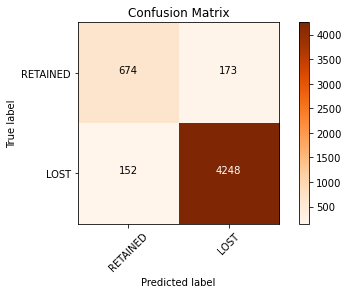

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, yy, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train, yy))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RETAINED','LOST'],normalize= False,  title='Confusion Matrix')

In [64]:
## F-1 Score, Jaccard Score and Accuracy Metric

print("F-1 Score = %.6f or %.2f%% Accurate" % (F1(y_train, yy, average='weighted'),(100*F1(y_train,yy,average='weighted')))) 

print("Jaccard Score = %.6f or %.2f%% Accurate" % (JACCARD(y_train, yy),(100*JACCARD(y_train, yy))))

print("The Accuracy Score is %.6f or %.2f%% Accurate" % (ACCURACY(y_train, yy),(100*ACCURACY(y_train, yy))))

F-1 Score = 0.937745 or 93.77% Accurate
Jaccard Score = 0.928931 or 92.89% Accurate
The Accuracy Score is 0.938060 or 93.81% Accurate


## End of Code to See How Model Fits Training Data ... The metric scores are still pretty high ... The metric scores for TESTING data are comparable showing the Machine Learning (ML) FIT is GOOD!

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       212
           1       0.96      0.95      0.96      1100

    accuracy                           0.93      1312
   macro avg       0.86      0.87      0.86      1312
weighted avg       0.93      0.93      0.93      1312

Confusion matrix, without normalization
[[ 166   46]
 [  52 1048]]


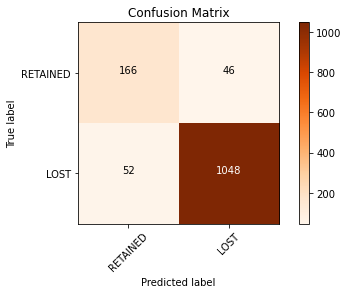

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, xx, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, xx))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RETAINED','LOST'],normalize= False,  title='Confusion Matrix')

In [59]:
# Computer F1 Score and Jaccard Similarity Score and Accuracy Score


print("F-1 Score = %.6f or %.2f%% Accurate" % (F1(y_test, xx, average='weighted'),(100*F1(y_test,xx,average='weighted')))) 

print("Jaccard Score = %.6f or %.2f%% Accurate" % (JACCARD(y_test, xx),(100*JACCARD(y_test, xx))))

print("The Accuracy Score is %.6f or %.2f%% Accurate" % (ACCURACY(y_test, xx),(100*ACCURACY(y_test, xx))))



F-1 Score = 0.925724 or 92.57% Accurate
Jaccard Score = 0.914485 or 91.45% Accurate
The Accuracy Score is 0.925305 or 92.53% Accurate


## PRETTY GOOD DEEP LEARNING FIT ... GENIUS!! ... GREAT MODELING!!